In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cost-of-living.csv')
df = df.rename(columns={"Unnamed: 0":"index"})
df = df.set_index("index").transpose().reset_index()
df = df.rename(columns={"index":"Country_Capital"})
df[["Capital","Country"]] = df['Country_Capital'].str.rsplit(',',expand=True,n=1)
df.info()
#df.to_csv('cost-of-living-clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 58 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country_Capital                                                             160 non-null    object 
 1   Meal, Inexpensive Restaurant                                                160 non-null    float64
 2   Meal for 2 People, Mid-range Restaurant, Three-course                       160 non-null    float64
 3   McMeal at McDonalds (or Equivalent Combo Meal)                              160 non-null    float64
 4   Domestic Beer (0.5 liter draught)                                           160 non-null    float64
 5   Imported Beer (0.33 liter draught)                                          160 non-null    float64
 6   Coke/Pepsi (0.33 liter bottle)                    

In [4]:
country = df.groupby('Country').mean()
capital = df.groupby('Capital').mean()
country

index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter draught),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4.100000,24.620000,4.760000,1.270000,2.000000,1.070000,0.540,1.070000,0.610000,1.470000,...,0.780000,1.200000,1.090000,0.900000,1.320000,0.660000,6.890000,17174.100000,127.150,2323.770000
Argentina,5.990000,20.970000,4.940000,1.500000,1.950000,0.940000,0.730,0.810000,1.100000,1.350000,...,0.770000,1.460000,0.770000,1.020000,1.130000,0.740000,4.710000,16555.150000,162.720,3114.280000
Armenia,4.700000,22.540000,4.600000,1.130000,1.690000,0.600000,0.340,0.820000,0.430000,1.440000,...,0.370000,1.950000,1.080000,0.710000,1.200000,0.500000,5.960000,19843.590000,141.660,3020.370000
Australia,11.606000,50.078000,7.172000,5.272000,5.458000,1.976000,1.666,0.940000,1.732000,2.636000,...,1.534000,2.680000,1.646000,2.864000,2.128000,1.582000,10.140000,15101.144000,1060.114,10779.152000
Austria,10.000000,45.000000,7.250000,4.000000,4.000000,2.770000,2.050,1.030000,1.750000,2.550000,...,1.190000,3.190000,1.260000,2.330000,1.670000,1.340000,14.300000,22357.620000,211.880,16035.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,17.490000,64.150000,7.000000,5.830000,5.250000,1.660000,1.310,1.130000,1.270000,2.390000,...,0.880000,3.300000,1.520000,2.680000,1.340000,1.200000,9.790000,25282.880000,1605.650,21240.000000
United States,13.734615,56.656923,7.202308,5.216923,5.977692,1.806154,1.440,0.775385,2.621538,2.393846,...,1.389231,3.827692,3.800769,3.609231,1.481538,2.194615,11.843077,18976.594615,1165.580,19353.713846
Uruguay,8.410000,31.230000,6.960000,1.920000,2.400000,1.250000,1.010,0.670000,1.690000,2.040000,...,0.900000,2.350000,1.010000,1.720000,1.810000,1.160000,7.100000,28427.940000,275.580,5749.210000


# Food 

## Analysis will look at different countries and their capitals to look at which of the countries have the cheapest food , beer , etc.

### NB the measure in in EUROS and calculates the price on average

we will be looking at the following:

Meal, Inexpensive Restaurant

Meal for 2 People, Mid-range Restaurant, Three-course   

McMeal at McDonalds (or Equivalent Combo Meal)    

Domestic Beer (0.5 liter draught)              

Imported Beer (0.33 liter bottle)              

Coke/Pepsi (0.33 liter bottle)      

Water (0.33 liter bottle)              

Milk (regular), (1 liter)                

Loaf of Fresh White Bread (500g)             

Eggs (regular) (12)                            

Local Cheese (1kg)                             

Water (1.5 liter bottle)                          

Bottle of Wine (Mid-Range)                         

Domestic Beer (0.5 liter bottle)                  

Imported Beer (0.33 liter bottle)                
                        
Cigarettes 20 Pack (Marlboro)    

Chicken Breasts (Boneless, Skinless), (1kg)

Apples (1kg)                           

Oranges (1kg)                                         

Potato (1kg)                              
                                 
Lettuce (1 head)                              

Cappuccino (regular)                                 

Rice (white), (1kg)                                  
                      
Tomato (1kg)                             

Banana (1kg)                            

Onion (1kg)                                     
                            
Beef Round (1kg) (or Equivalent Back Leg Red Meat)                         

# Take-Aways

<AxesSubplot:xlabel='Country'>

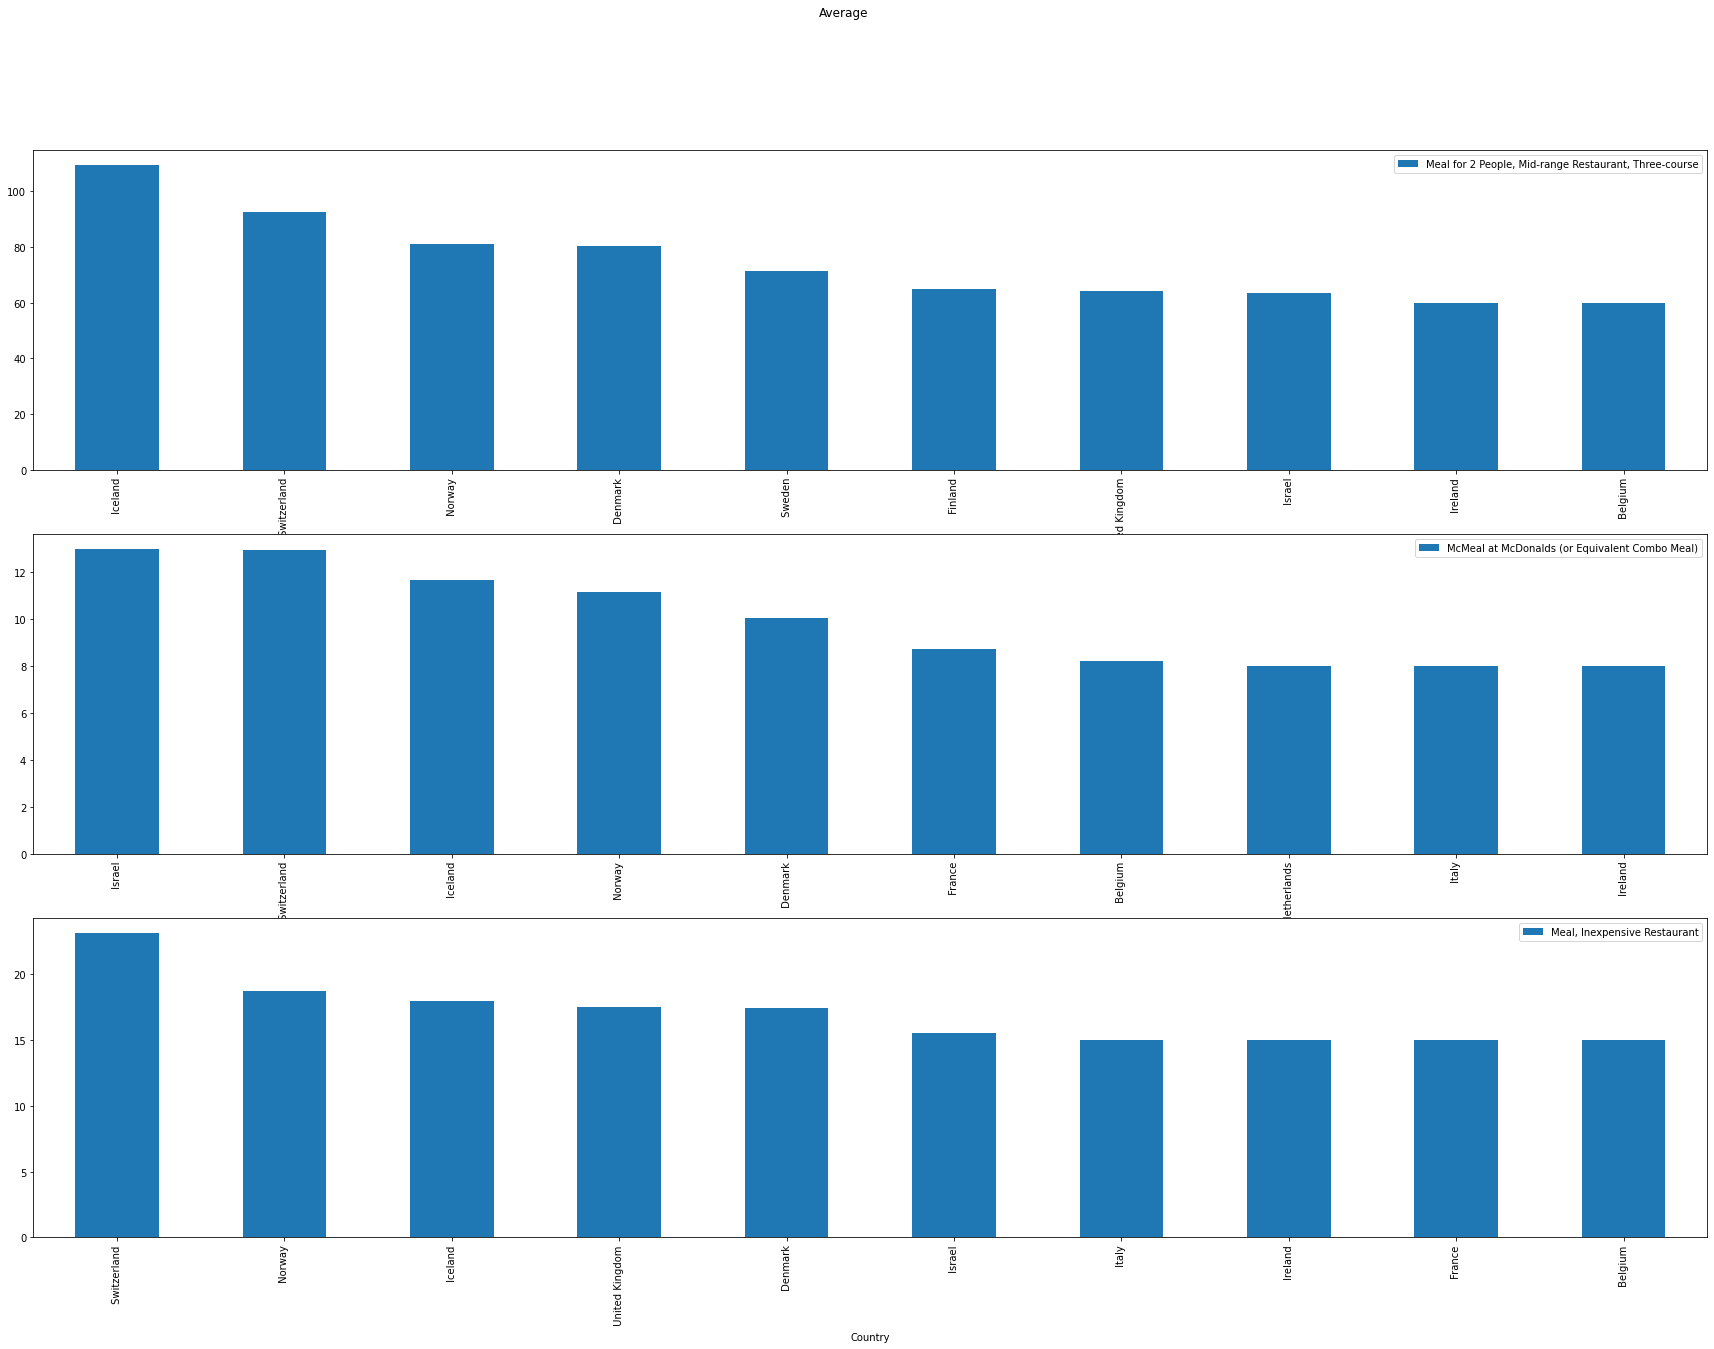

In [23]:
top_10_meal_2 = country.sort_values(by='Meal for 2 People, Mid-range Restaurant, Three-course',ascending=False).head(10)
top_10_mcd = country.sort_values(by='McMeal at McDonalds (or Equivalent Combo Meal)',ascending=False).head(10)
top_10_inexpensive = country.sort_values(by='Meal, Inexpensive Restaurant',ascending=False).head(10)

fig, axs = plt.subplots(3,figsize=(30,20))
fig.suptitle('Average')
top_10_meal_2.plot(y='Meal for 2 People, Mid-range Restaurant, Three-course',ax=axs[0],kind='bar')
top_10_mcd.plot(y='McMeal at McDonalds (or Equivalent Combo Meal)',ax=axs[1],kind='bar')
top_10_inexpensive.plot(y='Meal, Inexpensive Restaurant',ax=axs[2],kind='bar')


<AxesSubplot:xlabel='Capital'>

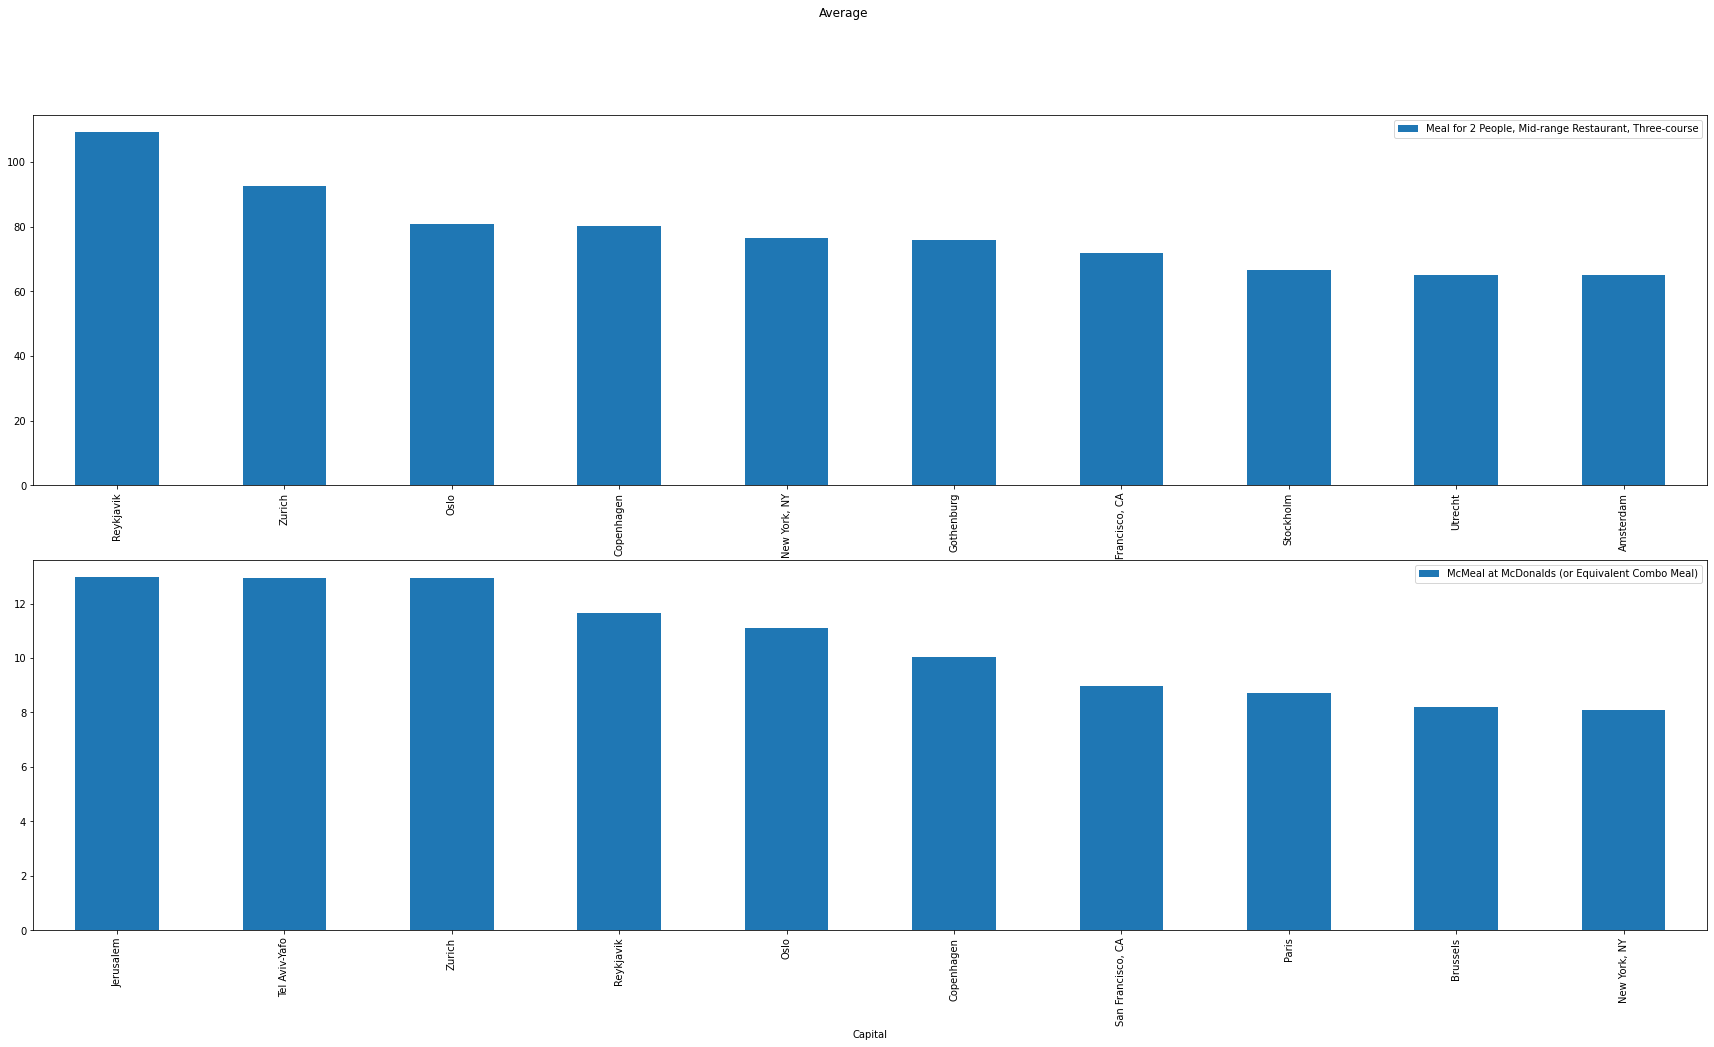

In [6]:
top_10_meal_2 = capital.sort_values(by='Meal for 2 People, Mid-range Restaurant, Three-course',ascending=False).head(10)
top_10_mcd = capital.sort_values(by='McMeal at McDonalds (or Equivalent Combo Meal)',ascending=False).head(10)
fig, axs = plt.subplots(2,figsize=(30,15))
fig.suptitle('Average')
top_10_meal_2.plot(y='Meal for 2 People, Mid-range Restaurant, Three-course',ax=axs[0],kind='bar')
top_10_mcd.plot(y='McMeal at McDonalds (or Equivalent Combo Meal)',ax=axs[1],kind='bar')

# Alcohol & Cigarettes

<AxesSubplot:xlabel='Country'>

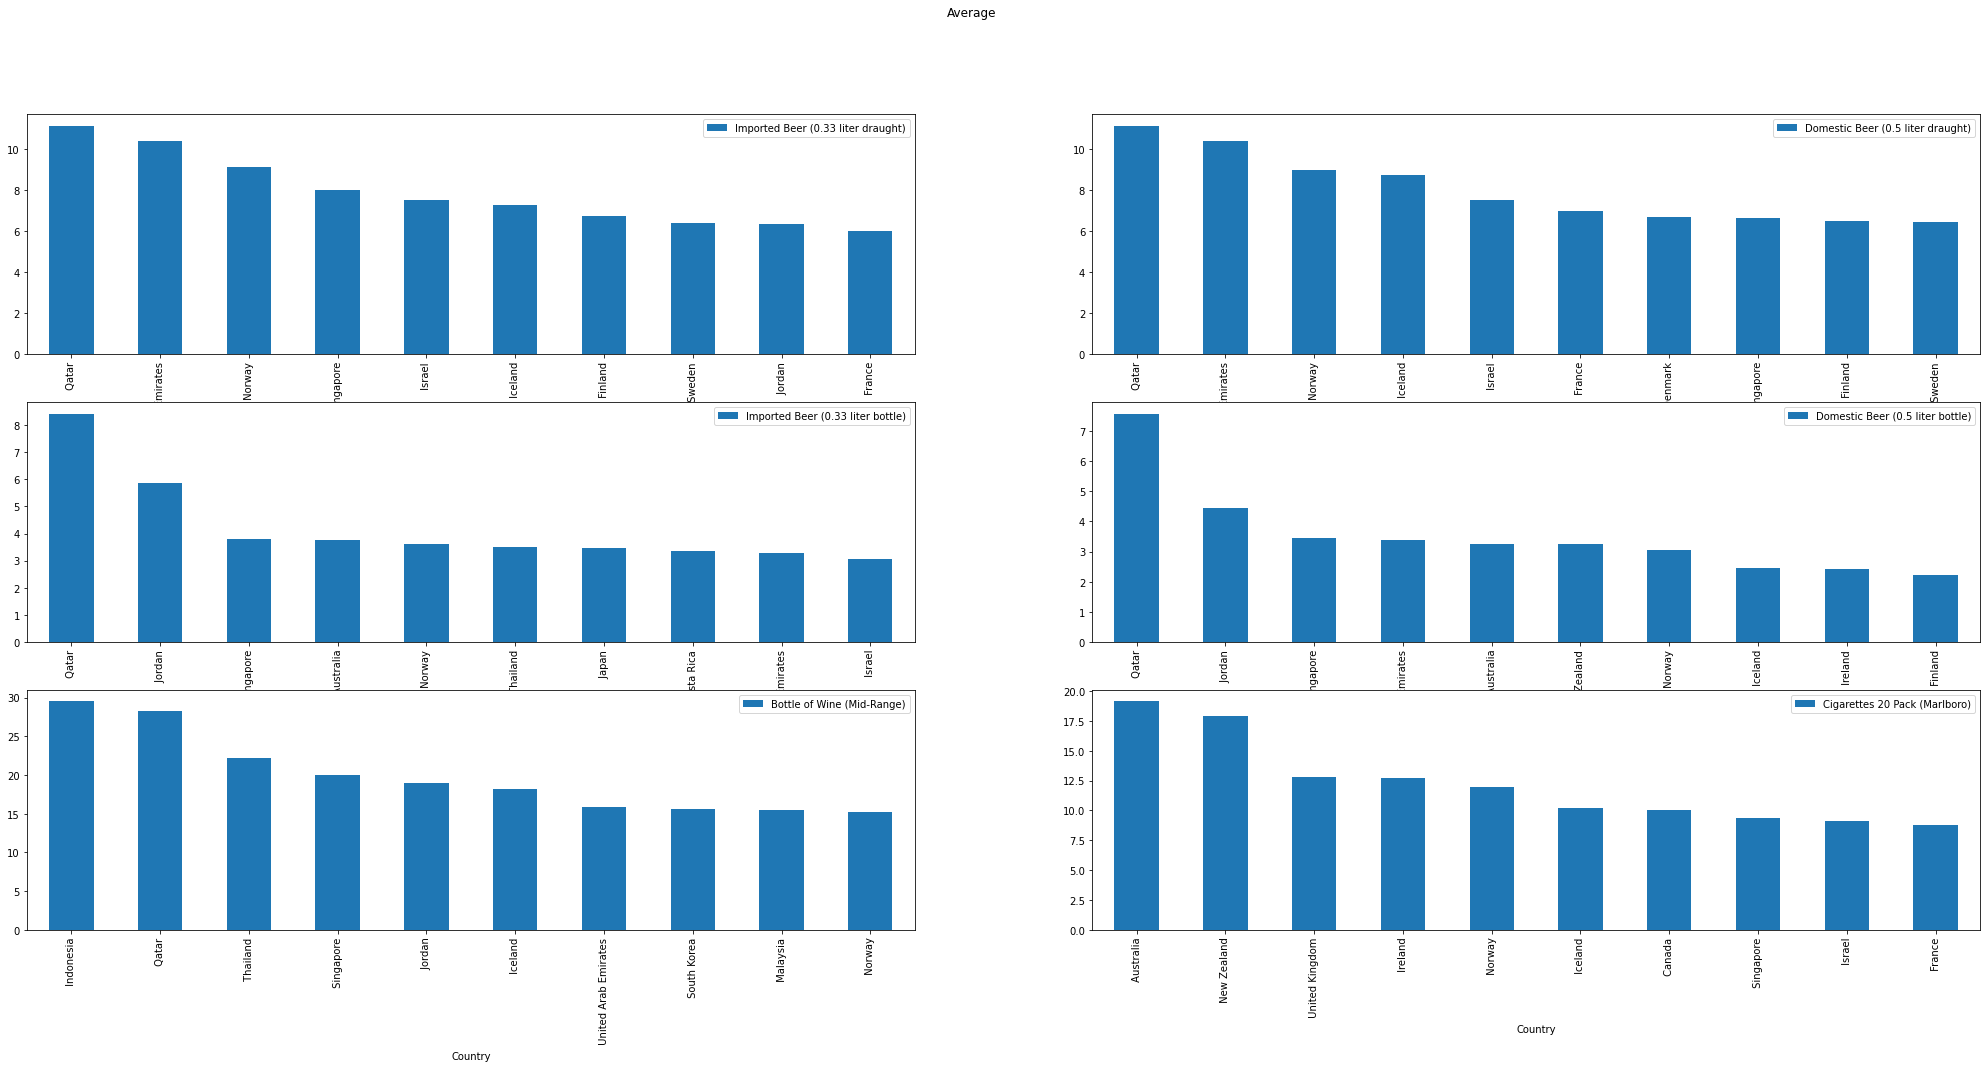

In [16]:
top_10_import_draught= country.sort_values(by='Imported Beer (0.33 liter draught)',ascending=False).head(10)
top_10_domestic_draught = country.sort_values(by='Domestic Beer (0.5 liter draught)',ascending=False).head(10)
top_10_import_beer= country.sort_values(by='Imported Beer (0.33 liter bottle)',ascending=False).head(10)
top_10_domestic_beer = country.sort_values(by='Domestic Beer (0.5 liter bottle)',ascending=False).head(10)
top_10_wine = country.sort_values(by='Bottle of Wine (Mid-Range)',ascending=False).head(10)
top_10_cigs = country.sort_values(by='Cigarettes 20 Pack (Marlboro)',ascending=False).head(10) 

fig, axs = plt.subplots(3,2 ,figsize=(35,15))
fig.suptitle('Average')

top_10_import_draught.plot(y='Imported Beer (0.33 liter draught)',ax=axs[0][0],kind='bar')
top_10_domestic_draught.plot(y='Domestic Beer (0.5 liter draught)',ax=axs[0][1],kind='bar')
top_10_import_beer.plot(y='Imported Beer (0.33 liter bottle)',ax=axs[1][0],kind='bar')
top_10_domestic_beer.plot(y='Domestic Beer (0.5 liter bottle)',ax=axs[1][1],kind='bar')
top_10_wine.plot(y='Bottle of Wine (Mid-Range)',ax=axs[2][0],kind='bar')
top_10_cigs.plot(y='Cigarettes 20 Pack (Marlboro)',ax=axs[2][1],kind='bar')

<AxesSubplot:xlabel='Capital'>

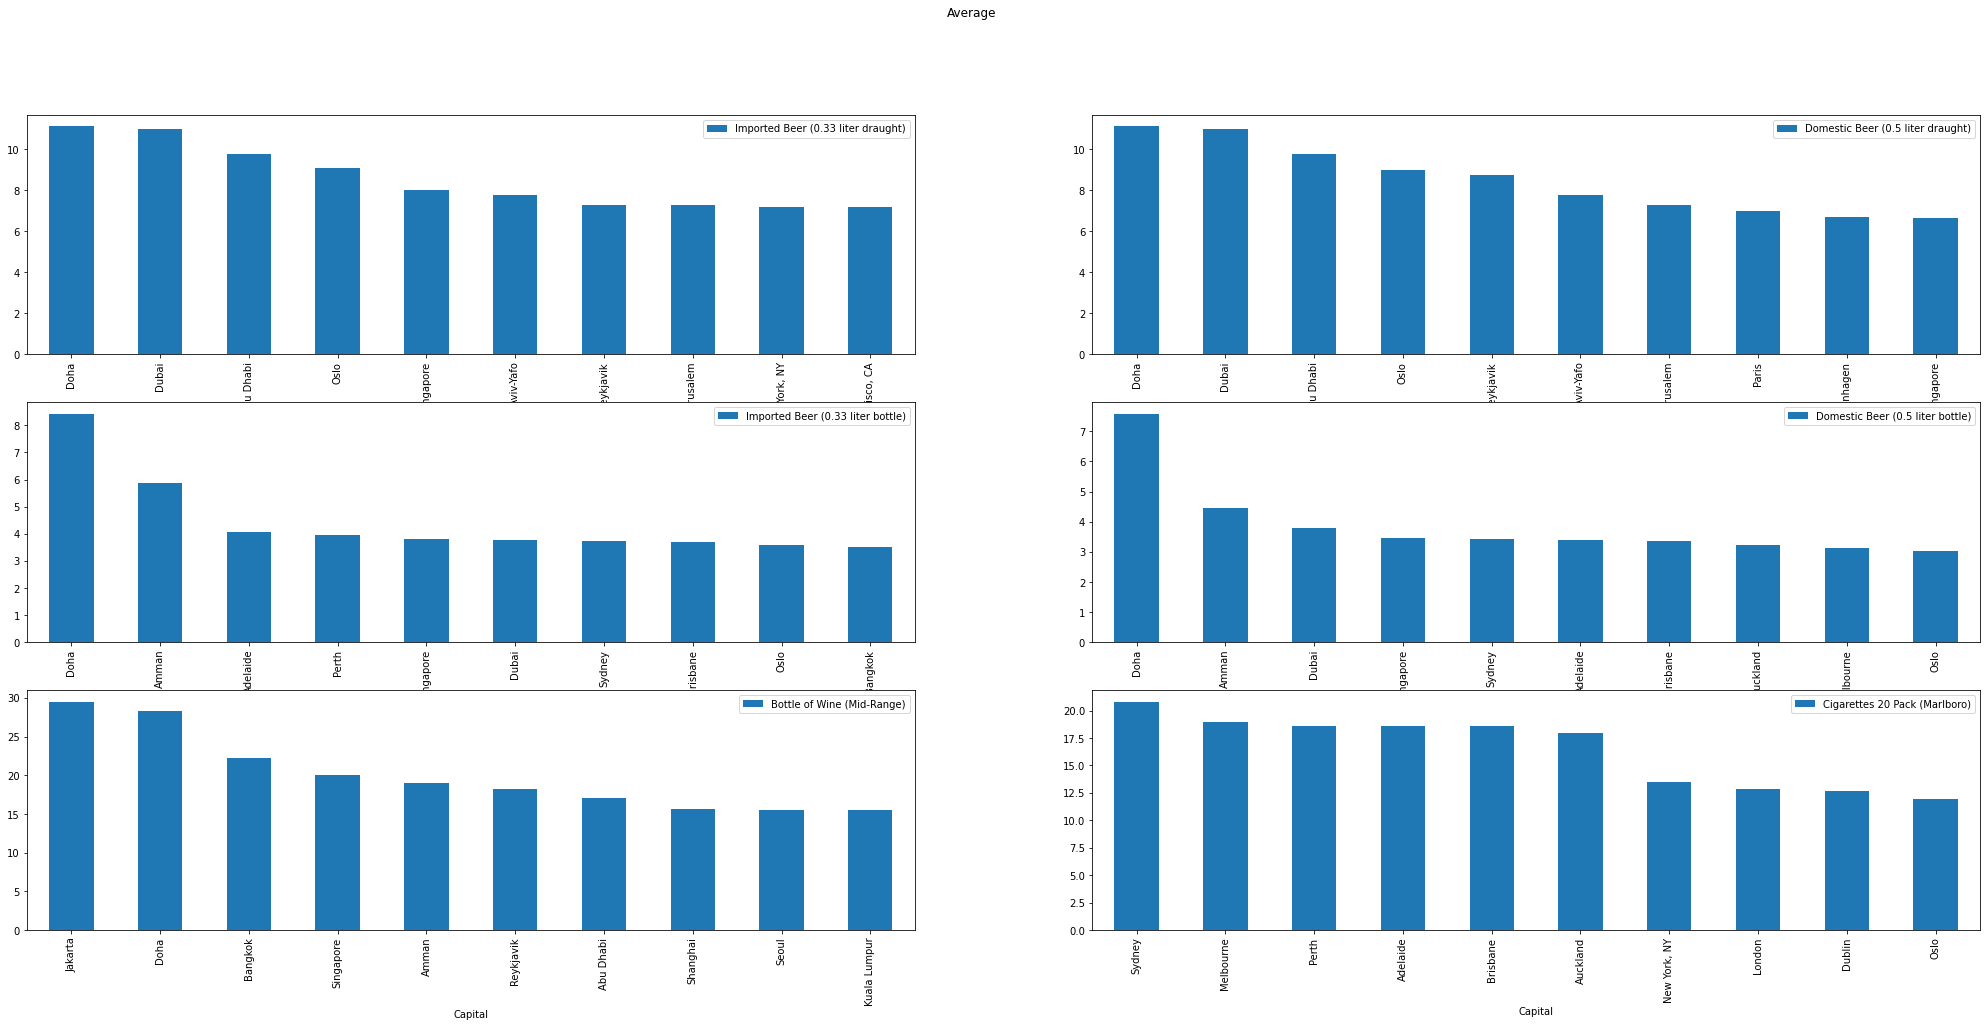

In [8]:
top_10_import_draught= capital.sort_values(by='Imported Beer (0.33 liter draught)',ascending=False).head(10)
top_10_domestic_draught = capital.sort_values(by='Domestic Beer (0.5 liter draught)',ascending=False).head(10)
top_10_import_beer= capital.sort_values(by='Imported Beer (0.33 liter bottle)',ascending=False).head(10)
top_10_domestic_beer = capital.sort_values(by='Domestic Beer (0.5 liter bottle)',ascending=False).head(10)
top_10_wine = capital.sort_values(by='Bottle of Wine (Mid-Range)',ascending=False).head(10)
top_10_cigs = capital.sort_values(by='Cigarettes 20 Pack (Marlboro)',ascending=False).head(10) 

fig, axs = plt.subplots(3,2 ,figsize=(35,15))
fig.suptitle('Average')

top_10_import_draught.plot(y='Imported Beer (0.33 liter draught)',ax=axs[0][0],kind='bar')
top_10_domestic_draught.plot(y='Domestic Beer (0.5 liter draught)',ax=axs[0][1],kind='bar')
top_10_import_beer.plot(y='Imported Beer (0.33 liter bottle)',ax=axs[1][0],kind='bar')
top_10_domestic_beer.plot(y='Domestic Beer (0.5 liter bottle)',ax=axs[1][1],kind='bar')
top_10_wine.plot(y='Bottle of Wine (Mid-Range)',ax=axs[2][0],kind='bar')
top_10_cigs.plot(y='Cigarettes 20 Pack (Marlboro)',ax=axs[2][1],kind='bar')

<AxesSubplot:xlabel='Country'>

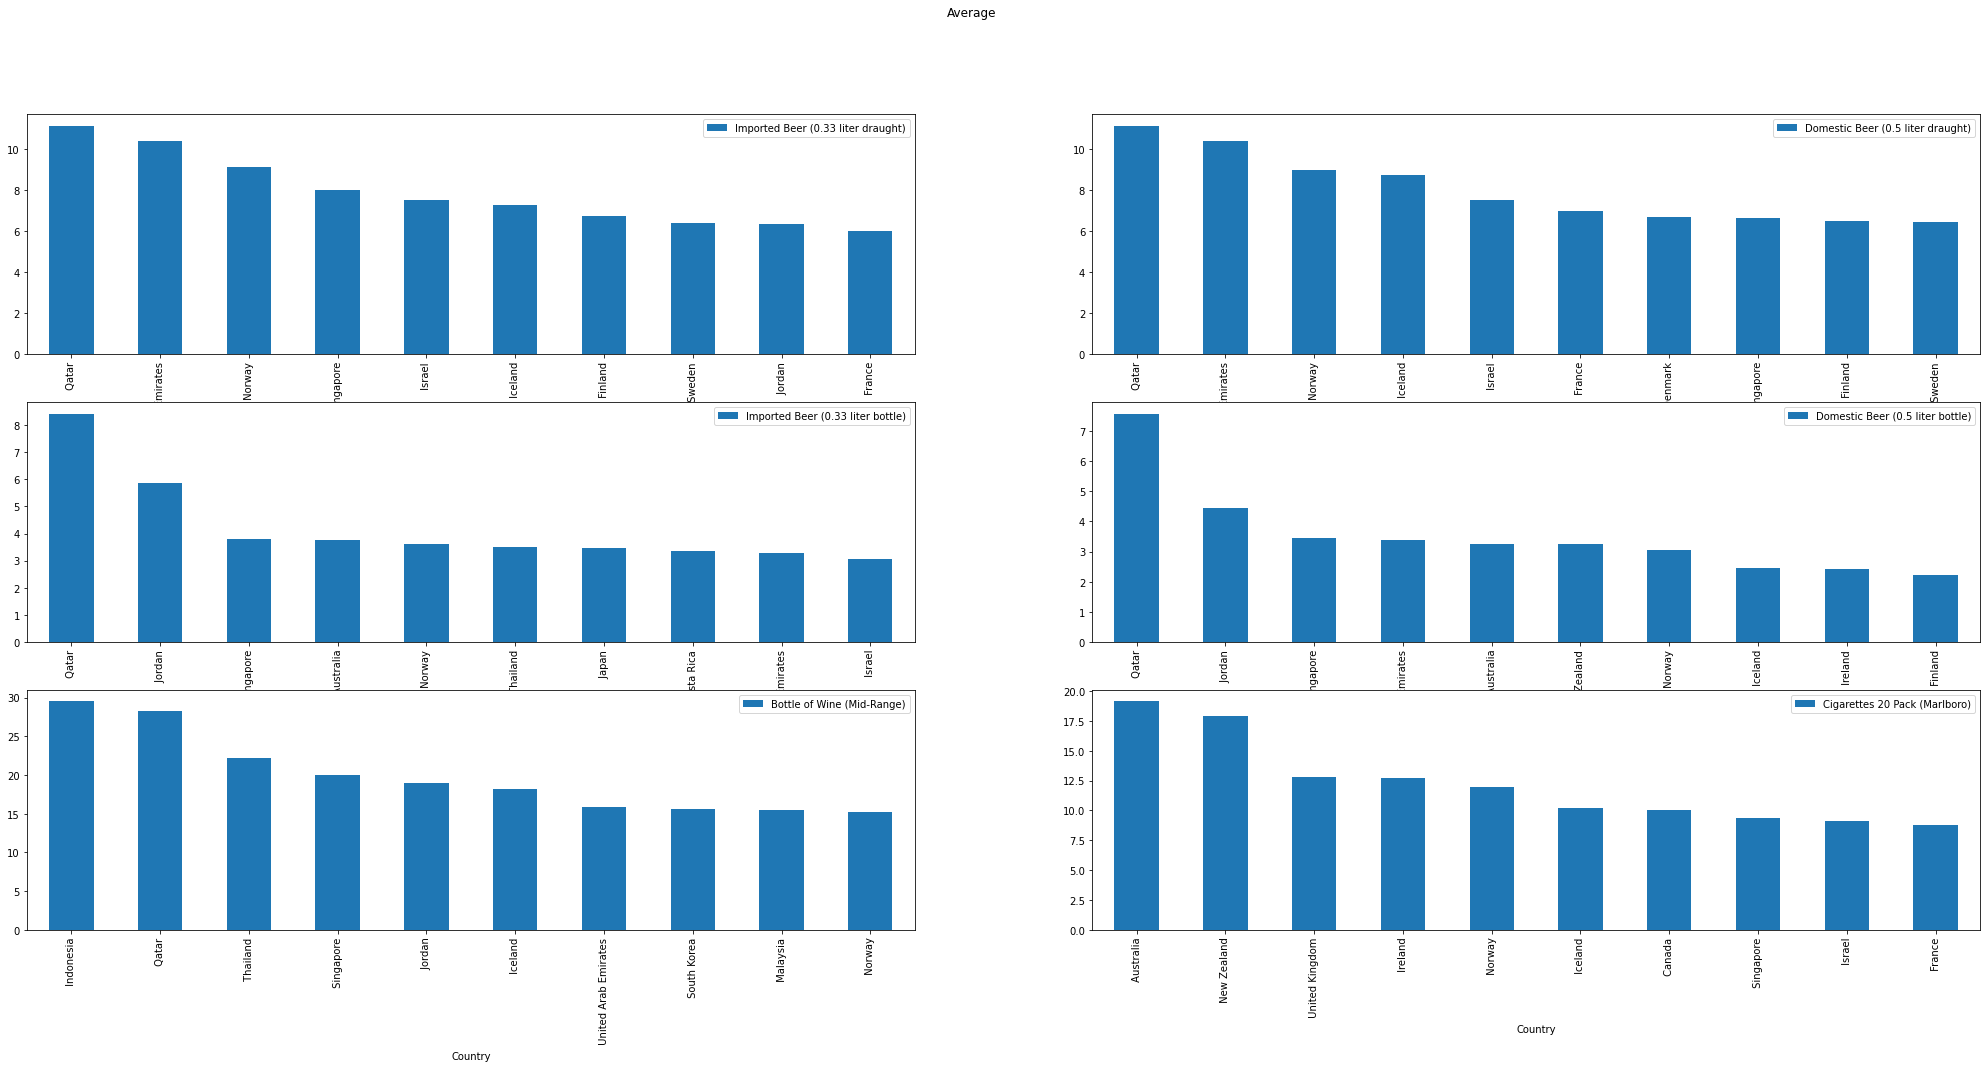

In [9]:
top_10_import_draught= country.sort_values(by='Imported Beer (0.33 liter draught)',ascending=False).head(10)
top_10_domestic_draught = country.sort_values(by='Domestic Beer (0.5 liter draught)',ascending=False).head(10)
top_10_import_beer= country.sort_values(by='Imported Beer (0.33 liter bottle)',ascending=False).head(10)
top_10_domestic_beer = country.sort_values(by='Domestic Beer (0.5 liter bottle)',ascending=False).head(10)
top_10_wine = country.sort_values(by='Bottle of Wine (Mid-Range)',ascending=False).head(10)
top_10_cigs = country.sort_values(by='Cigarettes 20 Pack (Marlboro)',ascending=False).head(10) 

fig, axs = plt.subplots(3,2 ,figsize=(35,15))
fig.suptitle('Average')

top_10_import_draught.plot(y='Imported Beer (0.33 liter draught)',ax=axs[0][0],kind='bar')
top_10_domestic_draught.plot(y='Domestic Beer (0.5 liter draught)',ax=axs[0][1],kind='bar')
top_10_import_beer.plot(y='Imported Beer (0.33 liter bottle)',ax=axs[1][0],kind='bar')
top_10_domestic_beer.plot(y='Domestic Beer (0.5 liter bottle)',ax=axs[1][1],kind='bar')
top_10_wine.plot(y='Bottle of Wine (Mid-Range)',ax=axs[2][0],kind='bar')
top_10_cigs.plot(y='Cigarettes 20 Pack (Marlboro)',ax=axs[2][1],kind='bar')

# Other beverages & Dairy


<AxesSubplot:xlabel='Country'>

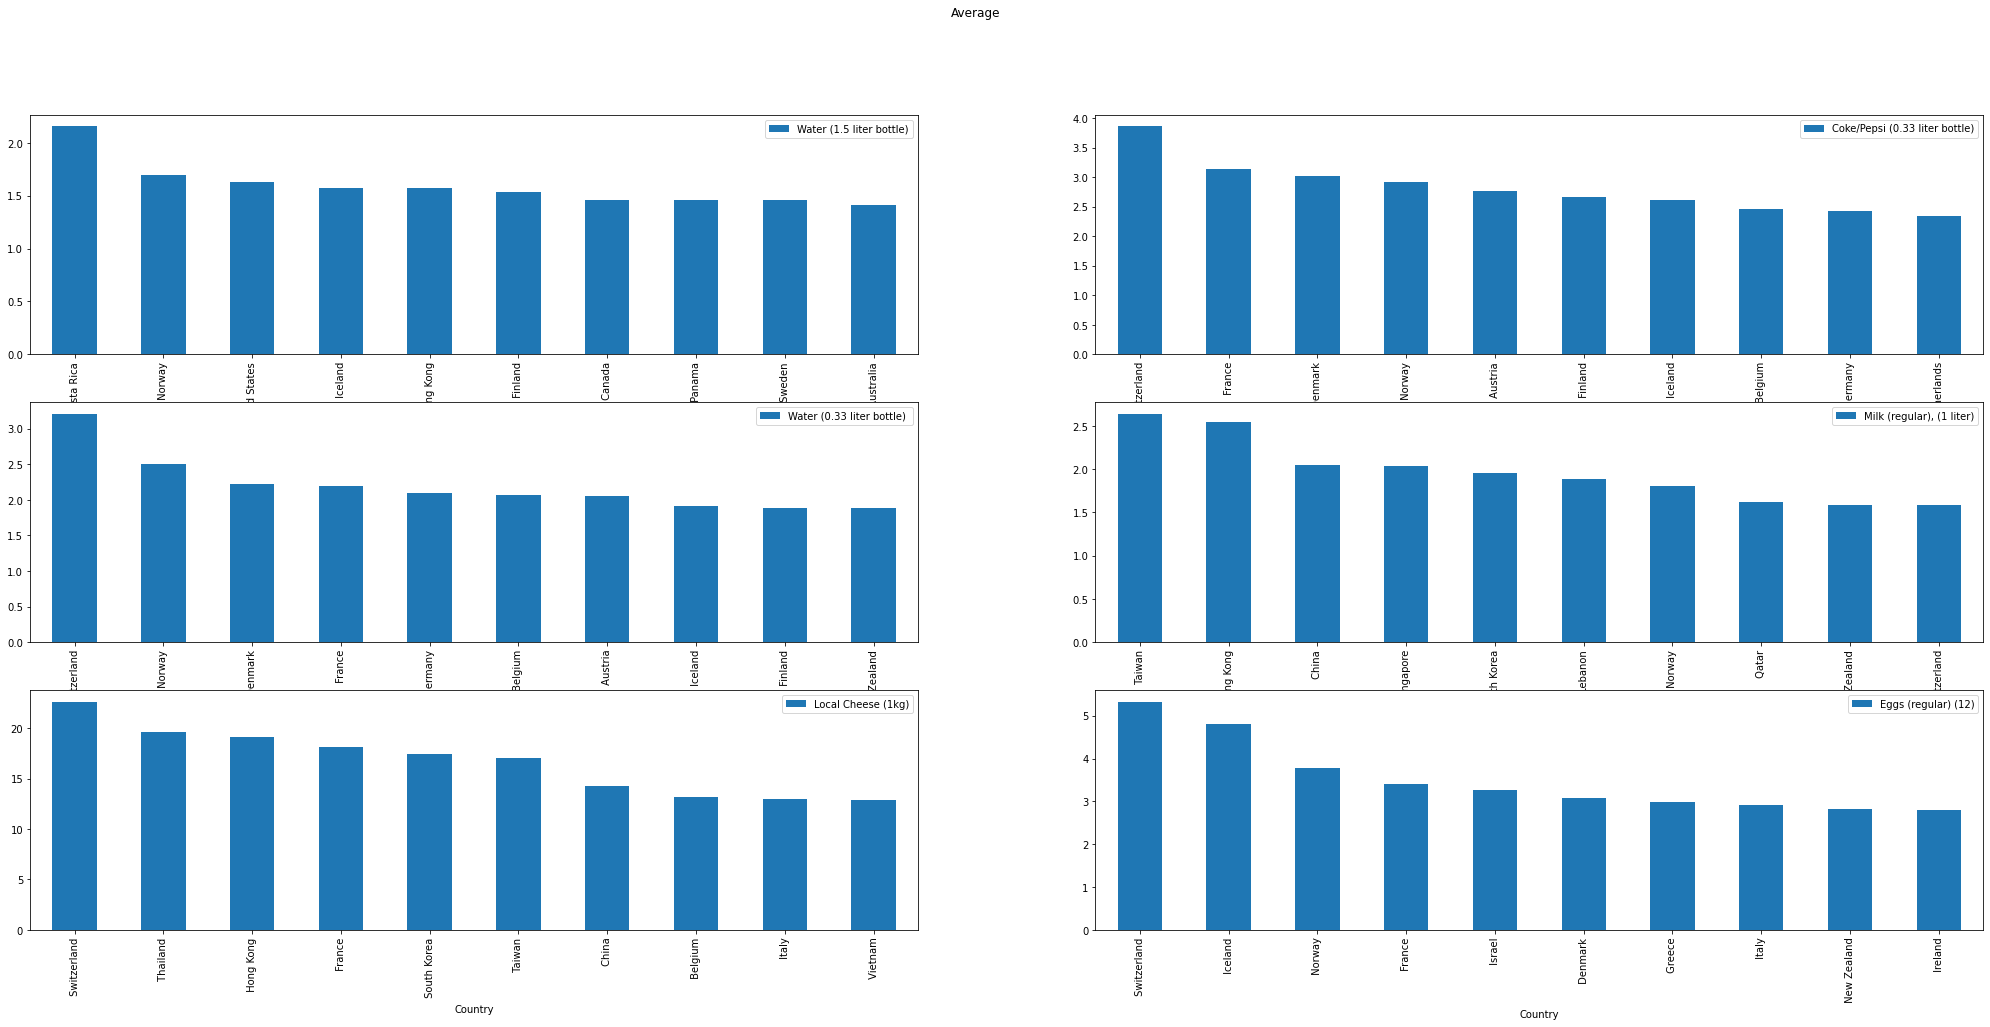

In [14]:
top_10_coke = country.sort_values(by='Coke/Pepsi (0.33 liter bottle)',ascending=False).head(10)
top_10_water = country.sort_values(by='Water (1.5 liter bottle)',ascending=False).head(10)
top_10_water_2 = country.sort_values(by='Water (0.33 liter bottle) ',ascending=False).head(10)
top_10_milk = country.sort_values(by='Milk (regular), (1 liter)',ascending=False).head(10)
top_10_cheese = country.sort_values(by='Local Cheese (1kg)',ascending=False).head(10)
top_10_eggs = country.sort_values(by='Eggs (regular) (12)',ascending=False).head(10)                       


fig, axs = plt.subplots(3,2 ,figsize=(35,15))
fig.suptitle('Average')

top_10_coke.plot(y='Coke/Pepsi (0.33 liter bottle)',ax=axs[0][1],kind='bar')
top_10_water.plot(y='Water (1.5 liter bottle)',ax=axs[0][0],kind='bar')
top_10_water_2.plot(y='Water (0.33 liter bottle) ',ax=axs[1][0],kind='bar')
top_10_milk.plot(y='Milk (regular), (1 liter)',ax=axs[1][1],kind='bar')
top_10_cheese.plot(y='Local Cheese (1kg)',ax=axs[2][0],kind='bar')
top_10_eggs.plot(y='Eggs (regular) (12)',ax=axs[2][1],kind='bar')


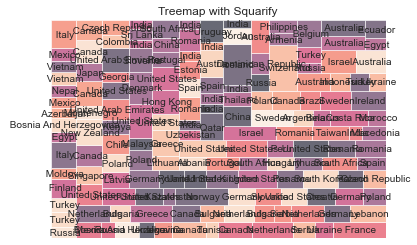

In [31]:

import squarify
import seaborn as sns

sns.set_style(style="whitegrid") # set seaborn plot style
sizes= df["Eggs (regular) (12)"].values# proportions of the categories
label=df["Country"]

squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()

In [ ]:
top_10_meal_2 = country.sort_values(by='Meal for 2 People, Mid-range Restaurant, Three-course',ascending=False).head(10)
top_10_mcd = country.sort_values(by='McMeal at McDonalds (or Equivalent Combo Meal)',ascending=False).head(10)
top_10_inexpensive = country.sort_values(by='Meal, Inexpensive Restaurant',ascending=False).head(10)